Tugas UTS Analisis Big Data

Nama Kelompok 2 :
- Diana Novita Sari
- Nurma Sari Laras Aji
- Moch Yogi Firmansyah

Disini Kelompok Kami Melakukan Exploratory Data Analysis (EDA) Pada Dataset IMDb Indonesian Movies yang bersumber dari
Kaggle.com  

Exploratory Data Analysis (EDA) adalah sebuah proses kritis dalam melakukan investigasi awal pada data dengan tujuan
menemukan pola, anomali, menguji hipotesis dan dapat memeriksa asumsi dengan bantuan statistik ringkasan kemudian
representasi grafis (visualisasi).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("dark")

import numpy as np
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.int` is a deprecated alias')

- Import Data CSV

In [3]:
# Import Data CSV
df = pd.read_csv('indonesian_movies.csv')
nRow, nCol = df.shape
print(f'{nRow} rows & {nCol} columns')
df.head()

1272 rows & 11 columns


,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


- Method info() mencetak informasi tentang DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


- Method description() mengembalikan deskripsi data dalam DataFrame

In [5]:
df.describe(include="all")

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
count,1272,1272.000000,840,1236,376,1272.000000,1272,1272,1265,1272,869
unique,1262,NaN,840,15,11,NaN,312,8,377,1266,85
top,Jomblo,NaN,Ayudia (Mawar De Jongh) is not satisfied enoug...,Drama,13+,NaN,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,2,NaN,1,456,161,NaN,58,1241,61,4,109
mean,NaN,2007.023585,NaN,NaN,NaN,6.144418,NaN,NaN,NaN,NaN,NaN
std,NaN,12.968560,NaN,NaN,NaN,1.389315,NaN,NaN,NaN,NaN,NaN
min,NaN,1926.000000,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN


- Melihat genre film apa saja yang ada pada dataset ini.

In [6]:
print(df['genre'].nunique(), 'unique genres:')
print(df['genre'].unique())

# NaN genre
df['genre'].notna().value_counts()

15 unique genres:
['Biography' 'Thriller' 'Horror' 'Adventure' 'Drama' 'Comedy' 'Animation'
 'Action' 'History' 'Crime' 'Romance' 'Sci-Fi' 'Family' nan 'War'
 'Fantasy']


True     1236
False      36
Name: genre, dtype: int64

- Melihat beberapa jenis penilaian atau rating pada dataset ini.

In [7]:
print(df['rating'].nunique(), 'unique ratings')
print(df['rating'].unique())

# NaN rating
df['rating'].notna().value_counts()

11 unique ratings
['13+' '17+' nan 'SU' 'TV-14' '21+' 'TV-MA' 'Not Rated' 'R' 'D' 'PG-13'
 'Unrated']


False    896
True     376
Name: rating, dtype: int64

- Cleaning Data

In [8]:
df = df.dropna(subset=['genre', 'directors'])
df = df.reset_index(drop=True)

Menyederhanakan kategori peringkat:

- 'SU' (Semua Usia)
- '13+' = 'R' = 'PG-13' = 'TV-14'
- '17+' = 'TV-MA' = 'D' = '21+'
- 'Not Rated' = 'Unrated'

Kami juga akan mengisi nilai nol dengan "Not Rated"

In [9]:
df['rating'] = df['rating'].fillna("Unrated")
df['rating'] = df['rating'].replace({
    "Not Rated": "Unrated",
    "R": "13+",
    "PG-13": "13+",
    "TV-14": "13+",
    "TV-MA": "17+",
    "D": "17+",
    "21+": "17+"
})

In [10]:
df["votes"] = df["votes"].apply(lambda x: x.replace(",", ""))
df["votes"] = df["votes"].astype(int)

- Menghitung jumlah film berdasarkan durasi

In [11]:
df["runtime"].value_counts()

90 min     108
100 min     43
95 min      33
94 min      24
97 min      24
          ... 
55 min       1
136 min      1
151 min      1
181 min      1
152 min      1
Name: runtime, Length: 85, dtype: int64

In [12]:
df["runtime"] = df["runtime"].fillna("90")
df["runtime"] = df["runtime"].apply(lambda x: x.replace(" min", ""))
df["runtime"] = df["runtime"].astype(int)

- Exploring Data

- Menghitung jumlah film dengan menampilkan diagram plot berdasarkan tahun terbit

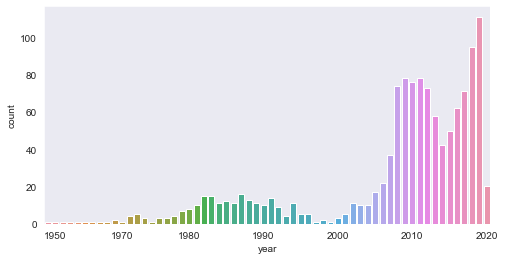

In [13]:
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="year", data=df)
# x-tick interval
for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

- Menampilkan 5 film terlama

In [14]:
df.sort_values("year", ascending = True).head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
1228,Loetoeng Kasaroeng,1926,NaN,Fantasy,Unrated,7.2,11,Indonesian,L. Heuveldorp,"['Martoana', 'Oemar', nan, nan, nan, nan, nan,...",60
1227,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,Unrated,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150
1226,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,Unrated,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116
1225,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,Unrated,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97
1224,Lewat Djam Malam,1954,A hero of revolution returns to civilian life ...,Drama,Unrated,7.5,94,Indonesian,Usmar Ismail,"['A.N. Alcaff', 'Dhalia', 'Netty Herawati', 'B...",101


- Menghitung jumlah film berdasarkan subtitle atau bahasa

In [15]:
df["languages"].value_counts().to_frame().rename(columns={"languages": "total movies"})

,total movies
Indonesian,1198
English,21
Japanese,3
Minangkabau,2
Dutch,2
French,1
Malay,1
Mandarin,1


- Menghitung jumlah rating pada film berdasarkan kolom rating dan digambarkan pada plot bar

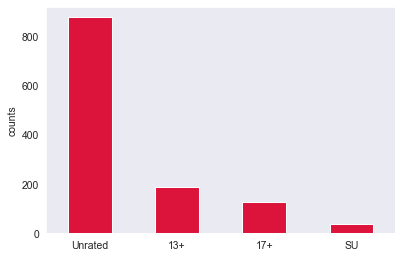

In [16]:
plt.figure(num = None, dpi = 75)
valueCounts = df["rating"].value_counts()

valueCounts.plot.bar(color='crimson')
plt.ylabel('counts')
plt.xticks(rotation=0)
plt.show()

- Menghitung jumlah film terbanyak berdasarkan genre

In [17]:
df["genre"].value_counts().to_frame().rename(columns={"genre": "total movies"})

,total movies
Drama,454
Comedy,287
Horror,229
Action,132
Adventure,47
Biography,27
Thriller,12
Romance,11
Fantasy,10
Crime,9


- Menampilkan film dengan rating terbaik disetiap genre

In [18]:
for genre in df["genre"].unique():
    data = df[df["genre"] == genre]
    print("The #1 movie in the genre", genre, "is =>", data.sort_values("users_rating", ascending = False).head(1)["title"].values[0])

The #1 movie in the genre Biography is => Wage
The #1 movie in the genre Thriller is => Fiksi.
The #1 movie in the genre Horror is => Malam Jumat Kliwon
The #1 movie in the genre Adventure is => Anak Garuda
The #1 movie in the genre Drama is => Salisiah Adaik
The #1 movie in the genre Comedy is => Horas Amang: Tiga Bulan Untuk Selamanya
The #1 movie in the genre Animation is => November 10th
The #1 movie in the genre Action is => Merah Putih Memanggil
The #1 movie in the genre History is => Moonrise Over Egypt
The #1 movie in the genre Crime is => Leaf on a Pillow
The #1 movie in the genre Romance is => Turis Romantis
The #1 movie in the genre Sci-Fi is => Kurung Manuk (Bird Cage)
The #1 movie in the genre Family is => Lima Elang
The #1 movie in the genre War is => Tropic of Emerald
The #1 movie in the genre Fantasy is => Loetoeng Kasaroeng


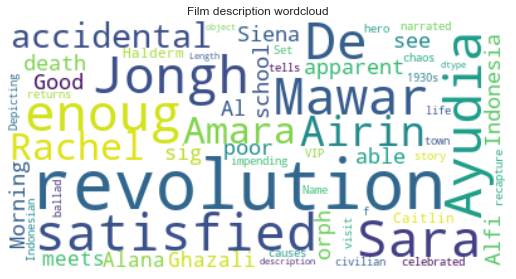

In [19]:
import random
from wordcloud import WordCloud
text = (str(df["description"].dropna()))
plt.subplots(figsize=(9,6))
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Film description wordcloud")
plt.axis("off")
plt.show()

- Method corr() menemukan korelasi setiap kolom dalam DataFrame.

In [20]:
# Misc
df.corr()

,year,users_rating,votes,runtime
year,1.000000,-0.005238,0.030013,0.042812
users_rating,-0.005238,1.000000,0.049259,0.263224
votes,0.030013,0.049259,1.000000,0.098434
runtime,0.042812,0.263224,0.098434,1.000000


<AxesSubplot:>

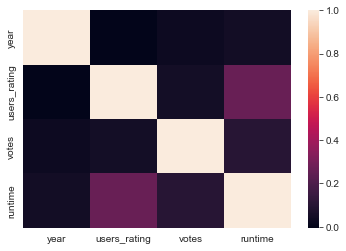

In [21]:
sns.heatmap(df.corr())

Hampir semua variabel memiliki korelasi yang sangat rendah satu sama lain. Tampaknya hanya runtime dan user_rating yang memiliki korelasi (lemah) satu sama lain